## Womens Ecommerce Clothing Reviews
This dataset was gotten from https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews and is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.  Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.
- **Age:** Positive Integer variable of the reviewers age.
- **Title:** String variable for the title of the review.
- **Review Text:** String variable for the review body.
- **Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.
- **Division Name:** Categorical name of the product high level division.
- **Department Name:** Categorical name of the product department name.
- **Class Name:** Categorical name of the product class name.

**Data Exploration**

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=[0] )
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i n...",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered th...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get no...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length t...,5,1,6,General,Tops,Blouses


In [3]:
##remove null values
print(data.isnull().sum())
data.dropna(inplace = True)

print('\nNull values dropped\n')
print(data.isnull().sum())

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Null values dropped

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [4]:
#seperate columns containing text data from other columns for ease of handling 
#text_data = data[['Class Name','Review Text']]
#other_data = data.drop(labels=['Clothing ID','Class Name','Review Text'], axis = 1)

In [5]:
#check class distribution of target class
data['Class Name'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

## Text Cleaning

**Remove Punctuation**

In [6]:
import string

In [7]:
def remove_puncts(text):
    """Function to remove punctuations from review text using list comprehension"""
    text_nopunct = ''.join([char for char in text if char not in string.punctuation ])
    return text_nopunct

In [8]:
##create new sataframe
text_data = pd.DataFrame()

#apply remoremove_puncts function to text data and save in created dataframe
text_data['cleaned_text'] = data['Review Text'].apply(remove_puncts)
text_data['cleaned_text'].head()

2    I had such high hopes for this dress and really wanted it to work for me i initially ordered the...
3    I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing bu...
4    This shirt is very flattering to all due to the adjustable front tie it is the perfect length to...
5    I love tracy reese dresses but this one is not for the very petite i am just under 5 feet tall a...
6    I aded this in my basket at hte last mintue to see what it would look like in person store pick ...
Name: cleaned_text, dtype: object

**Tokenization**

In [9]:
import re

In [10]:
def tokenize(text):
    """Tokenize text using regular expression"""
    tokens = re.split('\W', text)
    return tokens

In [11]:
text_data['cleaned_text'] = text_data['cleaned_text'].apply(tokenize)
text_data['cleaned_text'].head()

2    [I, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, ini...
3    [I, love, love, love, this, jumpsuit, its, fun, flirty, and, fabulous, every, time, i, wear, it,...
4    [This, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, ...
5    [I, love, tracy, reese, dresses, but, this, one, is, not, for, the, very, petite, i, am, just, u...
6    [I, aded, this, in, my, basket, at, hte, last, mintue, to, see, what, it, would, look, like, in,...
Name: cleaned_text, dtype: object

**Remove Stopwords**

In [12]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [13]:
def remove_stopwords(text):
    """Remove stopwords from data"""
    cleaned_text = [word for word in text if word not in stopwords]
    return cleaned_text

In [14]:
text_data['cleaned_text'] = text_data['cleaned_text'].apply(remove_stopwords)
text_data['cleaned_text'].head()

2    [I, high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, fo...
3    [I, love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, c...
4    [This, shirt, flattering, due, adjustable, front, tie, perfect, length, wear, leggings, sleevele...
5    [I, love, tracy, reese, dresses, one, petite, 5, feet, tall, usually, wear, 0p, brand, dress, pr...
6    [I, aded, basket, hte, last, mintue, see, would, look, like, person, store, pick, went, teh, dar...
Name: cleaned_text, dtype: object

**Lemmatizing**

In [15]:
#instantiate stemmer
wn = nltk.WordNetLemmatizer()

In [16]:
def stemming(text):
    """Stemm text in the data"""
    stemmed_text = [wn.lemmatize(word) for word in text]
    return stemmed_text

In [17]:
text_data['cleaned_text'] = text_data['cleaned_text'].apply(stemming)
text_data['cleaned_text'].head()

2    [I, high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, fou...
3    [I, love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, c...
4    [This, shirt, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveles...
5    [I, love, tracy, reese, dress, one, petite, 5, foot, tall, usually, wear, 0p, brand, dress, pret...
6    [I, aded, basket, hte, last, mintue, see, would, look, like, person, store, pick, went, teh, dar...
Name: cleaned_text, dtype: object

In [37]:
#save cleaned data o csv
text_data.to_csv(path_or_buf= 'cleaned_text.csv')

**Create Document term matrix using count vectorizer**

In [40]:
def clean_text(text):
    text_nopunct = ''.join([word.lower() for word in text if word not in string.punctuation ])
    tokens = re.split('\W', text_nopunct)
    stemmed_text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return stemmed_text

In [41]:
#instantiate countvectorier object
from sklearn.feature_extraction.text import CountVectorizer 

count_vec = CountVectorizer(analyzer=clean_text)

In [42]:
#fit and transform text data to document count matrix
text_counts = count_vec.fit_transform(text_data['cleaned_text'])
print('text data vectorized successfully')

text data vectorized successfully


In [43]:
#save document term matrix to new datafamw
text_count_df = pd.DataFrame(data= text_counts.toarray(), columns= count_vec.get_feature_names())
print(f'Data shape : {text_count_df.shape}')

Data shape : (19662, 19654)


**Feature engineering**

In [21]:
#save remaining data in new dataframe for ease of handling during feature engineering
other_data = data.drop(labels=['Clothing ID','Review Text','Title'], axis = 1)
other_data.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses
5,49,2,0,4,General,Dresses,Dresses
6,39,5,1,1,General Petite,Tops,Knits


In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

**Age Column**

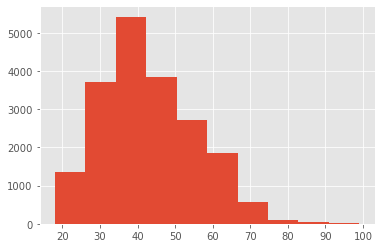

In [23]:
#check distribution of age column
plt.hist(other_data['Age'])
plt.show()

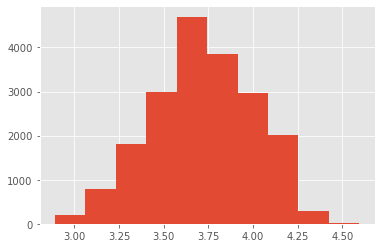

In [24]:
#transform age column using natural logarithm
other_data['Age'] = np.log(other_data['Age'])
plt.hist(other_data['Age'])
plt.show()

**Recommended IND Column**

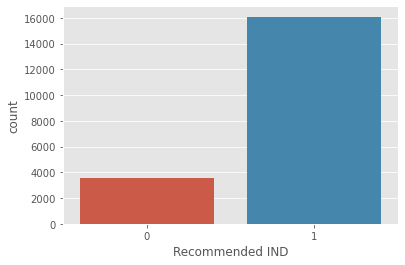

In [25]:
#check distribution of Recommended IND column
sns.countplot(other_data['Recommended IND'])

**Positive Feedback Count**

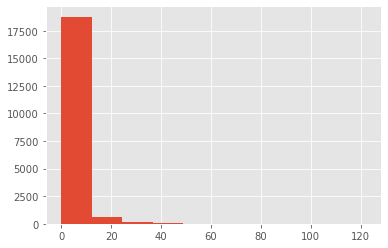

In [26]:
plt.hist(other_data['Positive Feedback Count'])
plt.show()

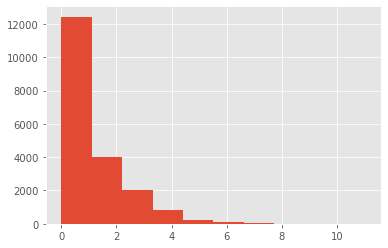

In [27]:
#transform age column using square root
other_data['Positive Feedback Count'] = np.sqrt(other_data['Positive Feedback Count'])
plt.hist(other_data['Positive Feedback Count'])
plt.show()

**Department Name and Division Name Columns**

In [28]:
#check unique values of data
print(other_data['Division Name'].unique())
print(other_data['Department Name'].unique())

['General' 'General Petite' 'Initmates']
['Dresses' 'Bottoms' 'Tops' 'Intimate' 'Jackets' 'Trend']


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [30]:
#encode Department Name and Divison Name
other_data['Division Name'] =encoder.fit_transform(other_data['Division Name'])
other_data['Department Name'] = encoder.fit_transform(other_data['Department Name'])

**Class Name Column**

In [31]:
other_data['Class Name'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

<br />

**NB :**

- There are too many classes in the target variable. All classes below 1000 would be changed to others 

In [32]:
other_data['Class Name'] = other_data['Class Name'].replace(to_replace=['Jeans', 'Fine guage', 'Skirts','Jackets',
                                                                       'Lounge','Swim','Outerwear','Shorts','Sleep',
                                                                       'Legwear','Intimates','Layering','Trend','Casual  bottoms', 'Chemises',
                                                                       'Fine gauge','Casual bottoms'],
                                                           value = 'Others')

In [38]:
#save other data to csv

other_data.to_csv(path_or_buf = 'other_data.csv')

In [39]:
#merge dataframes
new_df = pd.merge(left = other_data, right = text_count_df, left_index=True, right_index=True)

**Test Train Split**

In [41]:
from sklearn.model_selection import train_test_split

In [59]:
y = encoder.fit_transform(new_df['Class Name'].values.reshape(-1,1))
x = new_df.drop(labels='Class Name', axis = 1)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8, random_state = 10 )

**Modeling**

In [46]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(estimator = rf, X = x_train, y = y_train, cv = k_fold, scoring = 'accuracy', n_jobs = -1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.6min finished


array([0.69400152, 0.69134396, 0.68792711, 0.67805619, 0.69958223])

In [51]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
classification_report(y_test, rf_pred)